# Deep Learning for Fashion-MNIST: Accessory Classification Project

Import Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

Normalize images

In [36]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [37]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [38]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [39]:
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


Build a CNN Architecture

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [42]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)

lr_schedule = LearningRateScheduler(lr_scheduler)

In [44]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [45]:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [46]:
print("\nTraining with data augmentation...")
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(x_test, y_test),
    callbacks=[lr_schedule, early_stopping, model_checkpoint]
)


Training with data augmentation...
Epoch 1/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.9512 - accuracy: 0.6441 - val_loss: 0.6349 - val_accuracy: 0.7593 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.6921 - accuracy: 0.7406 - val_loss: 0.5708 - val_accuracy: 0.7833 - lr: 0.0010
Epoch 3/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.6185 - accuracy: 0.7658 - val_loss: 0.5256 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 4/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5664 - accuracy: 0.7869 - val_loss: 0.4491 - val_accuracy: 0.8341 - lr: 0.0010
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5360 - accuracy: 0.7997 - val_loss: 0.4538 - val_accuracy: 0.8339 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5065 - accuracy: 0.8119 - val_loss: 0.4415 - val_accuracy: 0.8393 - lr: 9.0484e-04
Epoch 

Depict loss vs. val_loss on a line chart

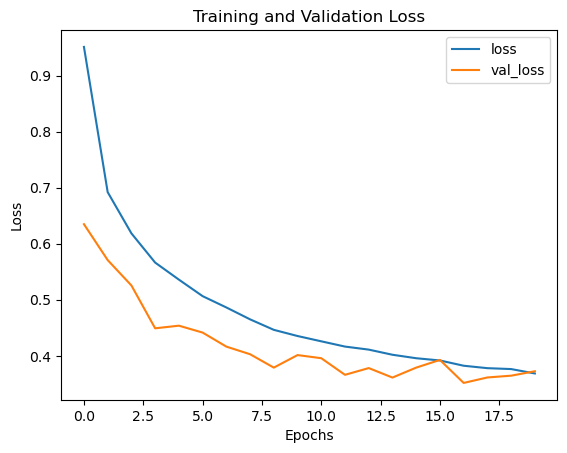

In [47]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Depict accuracy vs. val_accuracy on a line chart

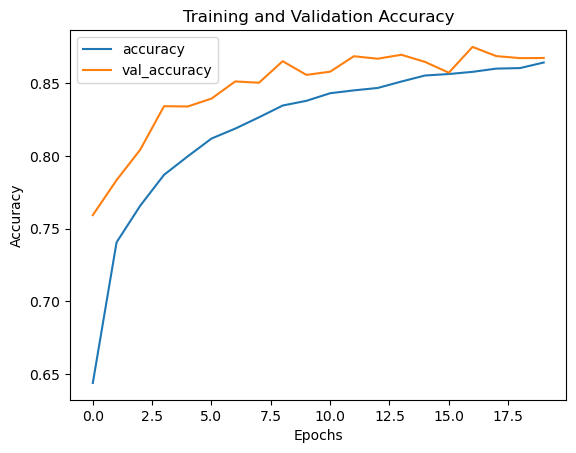

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [49]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 5ms/step


Compute confusion matrix and classification report

In [50]:
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

In [51]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[866   0  18  11   5   1  87   0  10   2]
 [  2 972   2  13   1   1   4   0   2   3]
 [ 15   0 833   6  52   0  93   0   1   0]
 [ 75   8  13 787  34   4  74   0   1   4]
 [  2   1  35  17 789   2 145   0   9   0]
 [  0   0   0   0   0 964   0  30   0   6]
 [173   0  77  10  70   0 656   0  12   2]
 [  0   0   0   0   0  21   0 950   0  29]
 [  2   0   5   0   3   2   5   4 979   0]
 [  0   0   0   0   0   8   0  39   1 952]]


In [52]:
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.83      0.84      1000
           3       0.93      0.79      0.85      1000
           4       0.83      0.79      0.81      1000
           5       0.96      0.96      0.96      1000
           6       0.62      0.66      0.64      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000



In [53]:
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


Final Training Accuracy: 0.8641
Final Validation Accuracy: 0.8672
